In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
df = pd.read_csv('Geologic_DataSet.csv')


In [14]:
df

,Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,292,3.080,97.680,4.64,1.848,48.306469
1,353,3.542,55.404,3.56,1.504,41.300912
2,259,4.411,87.360,3.56,2.176,49.688356
3,675,2.893,47.772,4.32,1.504,59.132694
4,457,3.498,13.128,6.04,1.520,39.503121
...,...,...,...,...,...,...
195,313,3.267,80.616,3.20,1.648,44.622765
196,987,3.718,53.184,3.92,1.664,64.961047
197,227,3.872,68.484,0.21,1.384,39.543047
198,448,2.728,69.900,7.56,1.880,59.004091


# Problem 1

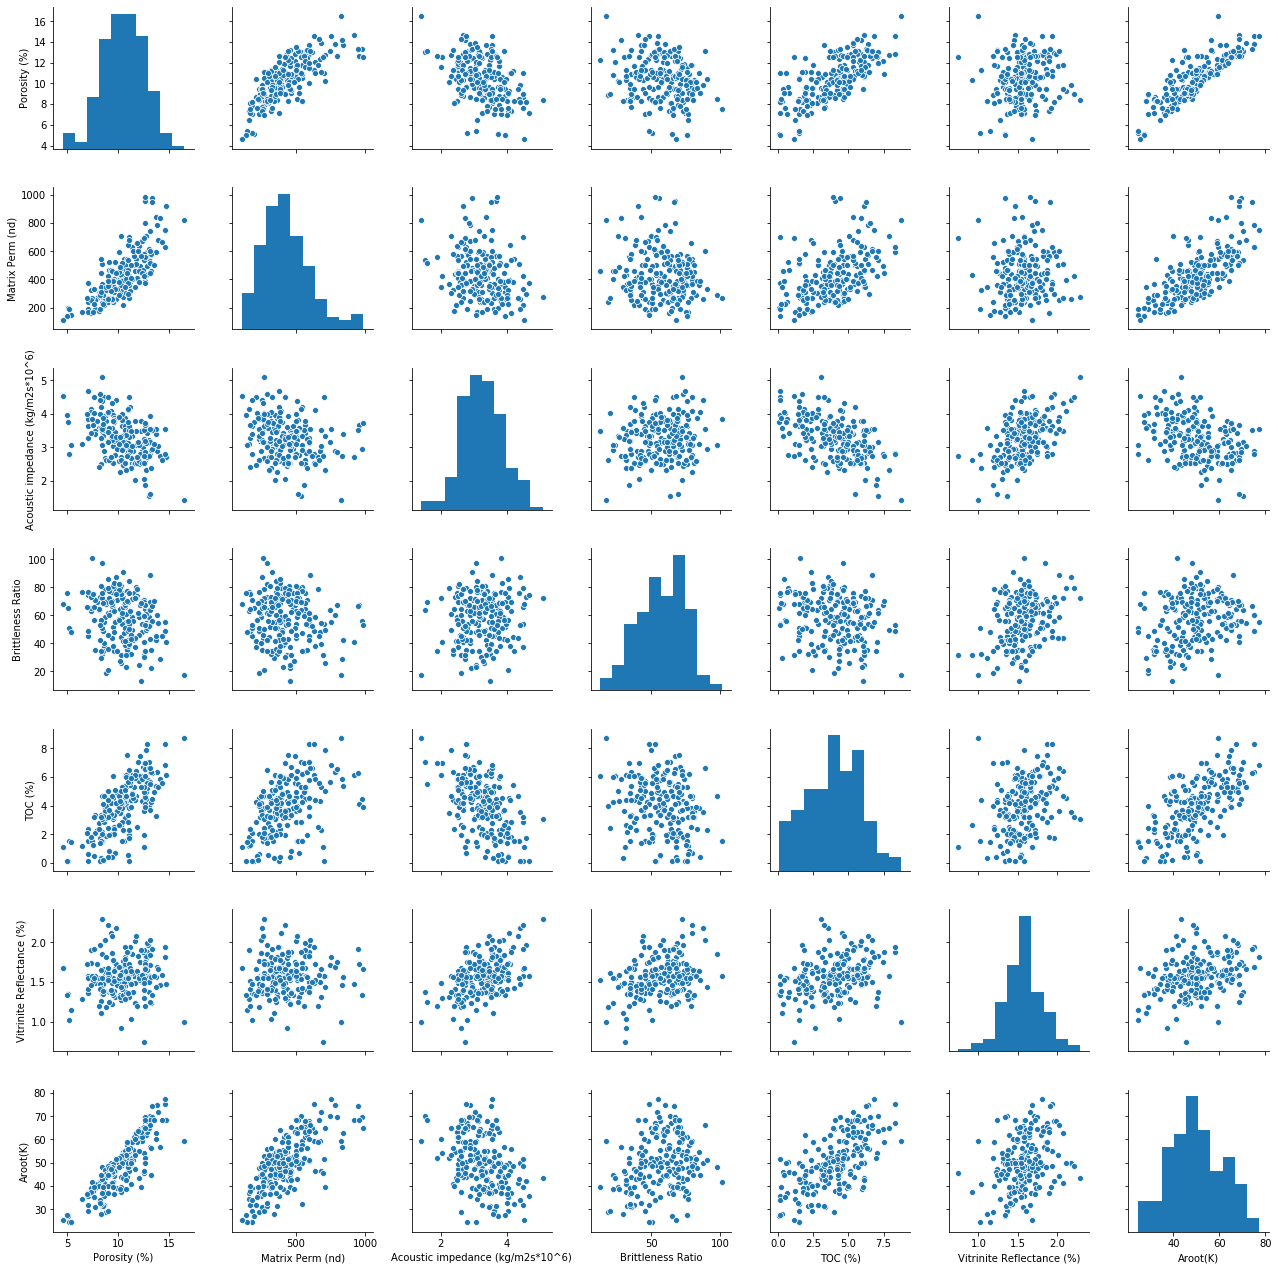

In [3]:
sns.pairplot(df)

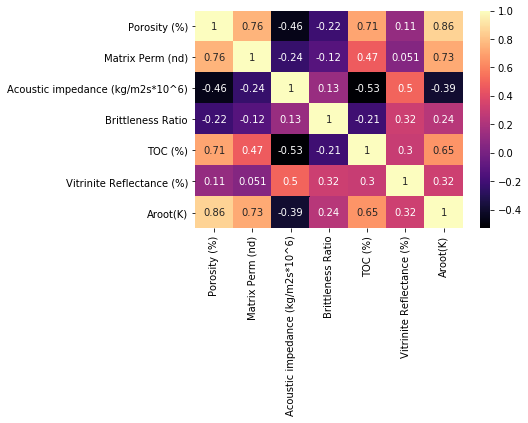

In [4]:
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [5]:
df.drop(axis=1,labels=['Porosity (%)'],inplace=True)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df_y = df_scaled['Aroot(K)']
df_x = df_scaled.loc[:,df_scaled.columns != 'Aroot(K)']
np.random.seed(1000)
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2)
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_x,df_y, test_size=0.4)
linreg = LinearRegression()
linreg1 = LinearRegression()
linreg.fit(x_train,y_train)
linreg1.fit(x_train1, y_train1)
y_pred = linreg.predict(x_train)
y_pred1 = linreg1.predict(x_train1)

# Seed 1000 ,Test size 0.2

In [8]:
from sklearn import metrics
coeff_df = pd.DataFrame(linreg.coef_,df_x.columns,columns=['Coefficient'])

print('Intercept of Linear Model (Test size 0.2): ' ,linreg.intercept_)
print('MAE (Test size 0.2):', round(metrics.mean_absolute_error(y_train, y_pred),5))
print('MSE (Test size 0.2):', round(metrics.mean_squared_error(y_train, y_pred),5))
print('RMSE (Test size 0.2):', round(np.sqrt(metrics.mean_squared_error(y_train, y_pred)),5))
coeff_df

Intercept of Linear Model (Test size 0.2):  0.10387195877451377
MAE (Test size 0.2): 0.06651
MSE (Test size 0.2): 0.00734
RMSE (Test size 0.2): 0.08569


,Coefficient
Matrix Perm (nd),0.668755
Acoustic impedance (kg/m2s*10^6),-0.680771
Brittleness Ratio,0.262066
TOC (%),-0.018258
Vitrinite Reflectance (%),0.658006


# Seed 1000, Test size 0.4

In [9]:
coeff_df1 = pd.DataFrame(linreg1.coef_,df_x.columns,columns=['Coefficient'])

print('Intercept of Linear Model (Test size 0.4): ' ,linreg.intercept_)
print('MAE (Test size 0.4):', round(metrics.mean_absolute_error(y_train1, y_pred1),5))
print('MSE (Test size 0.4):', round(metrics.mean_squared_error(y_train1, y_pred1),5))
print('RMSE (Test size 0.4):', round(np.sqrt(metrics.mean_squared_error(y_train1, y_pred1)),5))
coeff_df1

Intercept of Linear Model (Test size 0.4):  0.10387195877451377
MAE (Test size 0.4): 0.0651
MSE (Test size 0.4): 0.00693
RMSE (Test size 0.4): 0.08325


,Coefficient
Matrix Perm (nd),0.678655
Acoustic impedance (kg/m2s*10^6),-0.809364
Brittleness Ratio,0.219600
TOC (%),-0.128164
Vitrinite Reflectance (%),0.815501


# Problem 2

# Seed 200, Test size 0.3

In [10]:
np.random.seed(200)
x_train3,x_test3,y_train3,y_test3 = train_test_split(df_x,df_y,test_size=0.3)

linreg3 = LinearRegression()

linreg3.fit(x_train3,y_train3)

y_pred3 = linreg3.predict(x_train3)

coeff_df2 = pd.DataFrame(linreg3.coef_,df_x.columns,columns=['Coefficient'])

print('Intercept of Linear Model (Test size 0.3, Seed 200): ' ,linreg3.intercept_)
print('MAE (Test size 0.3, Seed 200):', round(metrics.mean_absolute_error(y_train3, y_pred3),5))
print('MSE (Test size 0.3, Seed 200):', round(metrics.mean_squared_error(y_train3, y_pred3),5))
print('RMSE (Test size 0.3, Seed 200):', round(np.sqrt(metrics.mean_squared_error(y_train3, y_pred3)),5))
coeff_df2

Intercept of Linear Model (Test size 0.3, Seed 200):  0.08585425868286312
MAE (Test size 0.3, Seed 200): 0.06406
MSE (Test size 0.3, Seed 200): 0.00696
RMSE (Test size 0.3, Seed 200): 0.0834


,Coefficient
Matrix Perm (nd),0.667594
Acoustic impedance (kg/m2s*10^6),-0.666348
Brittleness Ratio,0.280368
TOC (%),0.025499
Vitrinite Reflectance (%),0.620974


# Seed 400, Test size 0.3

In [11]:
np.random.seed(400)
x_train4,x_test4,y_train4,y_test4 = train_test_split(df_x,df_y,test_size=0.3)

linreg4 = LinearRegression()

linreg4.fit(x_train4,y_train4)

y_pred4 = linreg4.predict(x_train4)

coeff_df3 = pd.DataFrame(linreg4.coef_,df_x.columns,columns=['Coefficient'])

print('Intercept of Linear Model (Test size 0.3, Seed 400): ' ,linreg4.intercept_)
print('MAE (Test size 0.3, Seed 400):', round(metrics.mean_absolute_error(y_train4, y_pred4),5))
print('MSE (Test size 0.3, Seed 400):', round(metrics.mean_squared_error(y_train4, y_pred4),5))
print('RMSE (Test size 0.3, Seed 400):', round(np.sqrt(metrics.mean_squared_error(y_train4, y_pred4)),5))
coeff_df3

Intercept of Linear Model (Test size 0.3, Seed 400):  0.08803982170680985
MAE (Test size 0.3, Seed 400): 0.0688
MSE (Test size 0.3, Seed 400): 0.00749
RMSE (Test size 0.3, Seed 400): 0.08652


,Coefficient
Matrix Perm (nd),0.668541
Acoustic impedance (kg/m2s*10^6),-0.608619
Brittleness Ratio,0.209337
TOC (%),0.023717
Vitrinite Reflectance (%),0.641928


In [12]:
import pypandoc

In [13]:
pypandoc.convert_file('Assignment 9.md','docx',outputfile='Assignment9.docx')

''